# Simple ambit field example usage

This notebook shows how to use Python implementations for Algorithm 5 from Subsection 5.1 and Algorithm 7 from Appendix B.2 of https://arxiv.org/abs/2208.08784; figure 9 from the arxiv link have been created in the same way (check for the script). The full documentation can be found at https://danleonte.github.io/Ambit_Stochastics/index.html.
    
### Table of Contents

1. Simulation

    1.1. Slice  
    1.2. Cpp  
    
2. Parameter inference [to be updated]   
3. Forecasting  [to be added]

In [1]:
#module imports

%matplotlib inline
from ambit_stochastics.simple_ambit_field import simple_ambit_field
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

## 1. Simulation

Consider a homogeneous Lévy basis $L$, a (potentially unbounded) set of finite area $A \subset \mathbb{R}^d$ and a collection of time and space-indexed sets $A_t(x)$ given by
\begin{equation*}
    A_t(x) = A + (t,\mathbf{x}),
\end{equation*}
where $\mathbf{x} \in \mathbb{R}^{d-1}$. For ease of presentation, assume $d=2$ and that $A$ is of the form 
\begin{equation*}
A = \{(s,x) \in \mathbb{R}^2 \colon  s<0, 0 < x < \phi(s) \},
\end{equation*}
where $\phi \colon (-\infty,0] \to \mathbb{R}_{\ge 0}$ is an increasing, convex and continuous function. We refer to $\phi$ as the ambit function and to $A$ as the ambit set. We aim to simulate the simple ambit field spatio-temporal process $$Y_t(x)= Y(t,x)=  L(A_t) = L(A + (t,x)).$$ 
We restrict our attention to simulating on a grid with step-sizes $\tau$ and $x$ on the temporal, respectively spatial axis. Thus we aim to simulate the simple ambit field $Y(t,x)$ at coordinates $\{(j\tau;ix) : 1 \le j \le k_t;1 \le i \le k_s\}$, where $k_t$ and $k_s$ are the number of translation on the temporal, respectively spatial axis.

### 1.1 Slice method

In [20]:
x= 0.25              #distance between translations of the ambit sets on the space axis
tau = 0.25           #distance between translations of the ambit sets on the time  axis
k_s = 50            #nr of ambit sets on the space axis
k_t = 50            #nr of ambit sets on the time axis
nr_simulations = 2   #nr of simulations

#### one bounded and one unbounded ambit set ####
ambit_function1 = lambda x :  (x>-1) * (x<=0) * (1+x) * 2 #vertical ambit set
ambit_function2 = lambda x : np.exp(x/5) * (x<=0)         #horizontal  ambit set

decorrelation_time1 = -1
decorrelation_time2 = -np.inf
#################################################
gaussian_part_params = (-3,7)
jump_part_params = (2,3)
jump_part_name   = 'gamma' #can be None,'cauchy','invgauss','poisson' (more to be implemented)
total_nr_samples = 10**7   #total nr of samples to be used in the slice estimation procedure, see Algorithm 4 from https://arxiv.org/abs/2208.08784
batch_size = 5* 10**4      #how many such samples to consider at once to prevent memory errors. not too important 



In [18]:
simple_ambit_field1 = simple_ambit_field(x = x , tau = tau, k_s = k_s, k_t = k_t, nr_simulations = nr_simulations,
                                ambit_function=ambit_function1, decorrelation_time=decorrelation_time1,
                                gaussian_part_params=gaussian_part_params, jump_part_name=jump_part_name,
                                jump_part_params=jump_part_params, batch_size=batch_size, total_nr_samples=total_nr_samples)

simple_ambit_field2 = simple_ambit_field(x = x , tau = tau, k_s = k_s, k_t = k_t, nr_simulations = nr_simulations,
                                ambit_function=ambit_function2, decorrelation_time=decorrelation_time2,
                                gaussian_part_params=gaussian_part_params, jump_part_name=jump_part_name,
                                jump_part_params=jump_part_params, batch_size=batch_size, total_nr_samples=total_nr_samples)

In [19]:
simple_ambit_field1.simulate()


Slice estimation procedure has started
Slice estimation procedure has finished
5.044625997543335
12.51% of points are used in the slice estimation


In [9]:
simple_ambit_field2.simulate()
#infinite decorrelation time takes longer. might be worth exploring a cython implementation

Slice estimation procedure has started
Slice estimation procedure has finished
47.098745346069336
25.01% of points are used in the slice estimation


In [21]:
#helper code for plotting simple ambit fields
def plot_simple_ambit_field(x,t,k_s,k_t,values,simulation_to_use):
    x0 = np.linspace(x, k_s * x, k_s)
    t0 = np.linspace(t, k_t * t, k_t)
    T0, X0 = np.meshgrid(t0, x0)

    plt.contourf(T0, X0, values[simulation_to_use], 20, cmap='cividis')
    plt.colorbar();
    #plt.title('Simple ambit field')
    plt.savefig('simple_ambit_field_simulation_vertical' + str(simulation_to_use),bbox_inches='tight')

C:\Users\dleon\AppData\Local\Temp/ipykernel_1268/3501459899.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


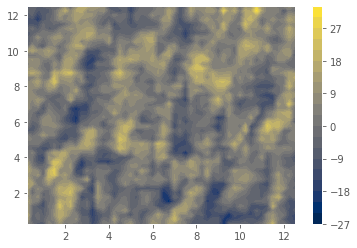

In [22]:
#the value of the first simple ambit field is given by the colour. note the vertical correlations
#see Figure 9 from https://arxiv.org/abs/2208.08784
plot_simple_ambit_field(x = x, t = tau, k_s = k_s, k_t = k_t, values = simple_ambit_field1.values, simulation_to_use = 1)

C:\Users\dleon\AppData\Local\Temp/ipykernel_1268/3501459899.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


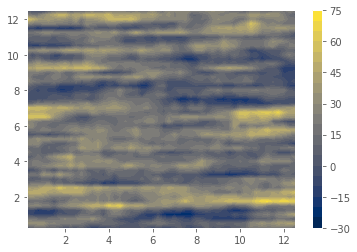

In [23]:
##the value of the second simple ambit field is given by the colour. note the vertical correlations
#see Figure 9 from https://arxiv.org/abs/2208.08784
plot_simple_ambit_field(x = x, t = tau, k_s = k_s, k_t = k_t, values = simple_ambit_field2.values, simulation_to_use = 1)